# Random Forest: An Overview

Random Forest is an **ensemble learning algorithm** that builds multiple **decision trees** and aggregates their predictions to improve accuracy and reduce overfitting. It operates using two key concepts:

1. **Bootstrap Sampling** – Each tree is trained on a randomly selected subset of the training data with replacement.
2. **Feature Randomness** – At each split, only a random subset of features is considered, increasing diversity among trees.

During **prediction**, the final output is determined by **majority voting** (for classification) or **averaging** (for regression). Random Forest is widely used due to its **robustness, scalability, and ability to handle both numerical and categorical data**. Additionally, it provides insights into **feature importance**, making it useful for interpretability. However, training a large number of trees can be computationally expensive.


In [6]:
import numpy as np
import pandas as pd
from collections import Counter

class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, data, features):
        self.tree = self._build_tree(data, features)

    def _build_tree(self, data, features, depth=0):
        if len(data) < self.min_samples_split or (self.max_depth is not None and depth >= self.max_depth):
            return Counter(data.iloc[:, -1])
        feature, threshold = self._best_split(data, features)
        if feature is None:
            return Counter(data.iloc[:, -1])
        left, right = self._split_data(data, feature, threshold)
        left_branch = self._build_tree(left, features, depth + 1)
        right_branch = self._build_tree(right, features, depth + 1)
        return (feature, threshold, left_branch, right_branch)

    def _best_split(self, data, features):
        best_feature = None
        best_threshold = None
        best_gini = 1
        for feature in features:
            thresholds = np.unique(data[feature])
            for threshold in thresholds:
                left, right = self._split_data(data, feature, threshold)
                if len(left) == 0 or len(right) == 0:
                    continue
                gini = (len(left) * self._gini_impurity(left.iloc[:, -1]) + len(right) * self._gini_impurity(right.iloc[:, -1])) / len(data)
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold
        return best_feature, best_threshold

    def _split_data(self, data, feature, threshold):
        left = data[data[feature] <= threshold]
        right = data[data[feature] > threshold]
        return left, right

    def _gini_impurity(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
        return 1 - np.sum(probabilities ** 2)

    def predict(self, sample):
        return self._predict_tree(self.tree, sample)

    def _predict_tree(self, tree, sample):
        if isinstance(tree, Counter):
            return tree.most_common(1)[0][0]
        feature, threshold, left, right = tree
        if sample[feature] <= threshold:
            return self._predict_tree(left, sample)
        else:
            return self._predict_tree(right, sample)


In [7]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=None, min_samples_split=2, max_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []

    def fit(self, data):
        for _ in range(self.n_trees):
            bootstrap = self._bootstrap_sample(data)
            features = np.random.choice(data.columns[:-1], size=self.max_features, replace=False)
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(bootstrap, features)
            self.trees.append(tree)

    def _bootstrap_sample(self, data):
        indices = np.random.choice(len(data), size=len(data), replace=True)
        return data.iloc[indices]

    def predict(self, sample):
        predictions = [tree.predict(sample) for tree in self.trees]
        return Counter(predictions).most_common(1)[0][0]

    def evaluate(self, test_data):
        predictions = [self.predict(test_data.iloc[i]) for i in range(len(test_data))]
        accuracy = np.mean(predictions == test_data.iloc[:, -1])
        return accuracy


In [8]:
def load_iris_dataset():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
    data = pd.read_csv(url, header=None, names=column_names)
    return data

def train_test_split(data, test_size=0.2, seed=42):
    np.random.seed(seed)
    shuffled = data.sample(frac=1, random_state=seed)
    test_size = int(len(shuffled) * test_size)
    test_data = shuffled.iloc[:test_size]
    train_data = shuffled.iloc[test_size:]
    return train_data, test_data


In [9]:
def main():
    data = load_iris_dataset()
    train_data, test_data = train_test_split(data)
    forest = RandomForest(n_trees=10, max_depth=5, max_features=2)
    forest.fit(train_data)
    accuracy = forest.evaluate(test_data)
    print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

if __name__ == "__main__":
    main()


Random Forest Accuracy: 96.67%


Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



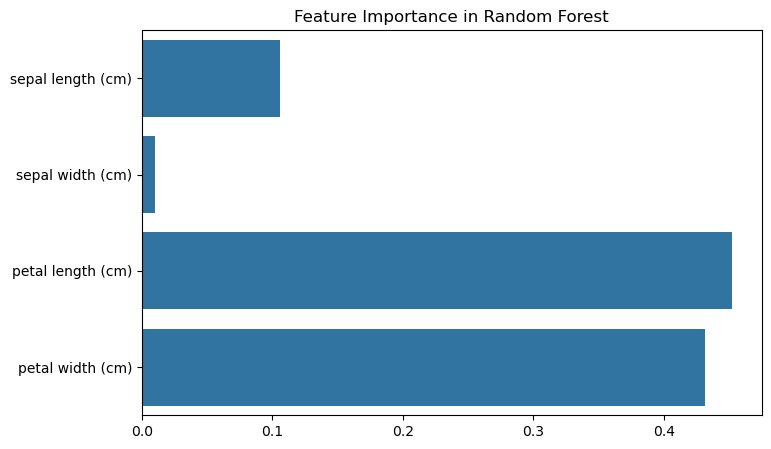

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

# Step 1: Load Data
class RandomForestClassification:
    def __init__(self):
        self.data = load_iris()
        self.df = pd.DataFrame(self.data.data, columns=self.data.feature_names)
        self.df['target'] = self.data.target
        self.model = None

    def preprocess_data(self):
        X = self.df.drop(columns=['target'])
        y = self.df['target']
        return train_test_split(X, y, test_size=0.2, random_state=42)

    def train_model(self, n_estimators=100, max_depth=None):
        X_train, X_test, y_train, y_test = self.preprocess_data()
        self.model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        self.model.fit(X_train, y_train)

        y_pred = self.model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        print(f'Accuracy: {accuracy:.4f}')
        print('\nClassification Report:')
        print(classification_report(y_test, y_pred))

    def feature_importance(self):
        if self.model is None:
            raise ValueError("Model has not been trained yet!")
        
        importance = self.model.feature_importances_
        feature_names = self.data.feature_names

        plt.figure(figsize=(8, 5))
        sns.barplot(x=importance, y=feature_names)
        plt.title("Feature Importance in Random Forest")
        plt.show()


# Run the classification model
rf_classifier = RandomForestClassification()
rf_classifier.train_model(n_estimators=100, max_depth=3)
rf_classifier.feature_importance()
